# Transformation of Marketing Audiences into Synthetic Investable Assets with Ova-Ünal Model and Black-Litterman Portfolio Allocation Approach

## Black-Litterman Model

In finance, the Black–Litterman model is a mathematical model for portfolio allocation developed in 1990 at Goldman Sachs by Fischer Black and Robert Litterman, and published in 1992. It seeks to overcome problems that institutional investors have encountered in applying modern portfolio theory in practice. The model starts with an asset allocation based on the equilibrium assumption (assets will perform in the future as they have in the past) and then modifies that allocation by taking into account the opinion of the investor regarding future asset performance.

Asset allocation is the decision faced by an investor who must choose how to allocate their portfolio across a number of asset classes. For example, a globally invested pension fund must choose how much to allocate to each major country or region.

In principle Modern Portfolio Theory (the mean-variance approach of Markowitz) offers a solution to this problem once the expected returns and covariances of the assets are known. While Modern Portfolio Theory is an important theoretical advance, its application has universally encountered a problem: although the covariances of a few assets can be adequately estimated, it is difficult to come up with reasonable estimates of expected returns.

Black–Litterman overcame this problem by not requiring the user to input estimates of expected return; instead it assumes that the initial expected returns are whatever is required so that the equilibrium asset allocation is equal to what we observe in the markets. The user is only required to state how his assumptions about expected returns differ from the markets and to state his degree of confidence in the alternative assumptions. From this, the Black–Litterman method computes the desired (mean-variance efficient) asset allocation.

In general, when there are portfolio constraints - for example, when short sales are not allowed - the easiest way to find the optimal portfolio is to use the Black–Litterman model to generate the expected returns for the assets, and then use a mean-variance optimizer to solve the constrained optimization problem.

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

In [272]:
df = pd.read_csv('audience_roi.csv') #audience combination and ROI
df = df.set_index('Date')
market_prices = df
prices = df

In [273]:
prices.tail()

,MALE1824ISTANBUL,MALE2436ISTANBUL,FEMALE1824ISTANBUL,FEMALE2436ISTANBUL,MALE1824IZMIR,MALE2436IZMIR,FEMALE1824ANKARA,FEMALE2436ANKARA
Date,,,,,,,,
2021-02-08,33.229399,33.090000,35.982999,19.000000,25.337333,12.4800,21.158000,24.247000
2021-02-09,33.050000,32.950001,35.956000,18.821001,25.530666,12.4250,21.598000,24.377000
2021-02-10,32.865801,32.980000,35.612000,18.963000,25.470667,12.4000,21.439999,24.282001
2021-02-11,32.621299,32.880001,35.220001,19.091000,25.680001,12.5750,21.427000,24.449001
2021-02-12,32.777100,33.369999,35.275000,18.767000,25.678001,12.6725,21.389999,24.499001


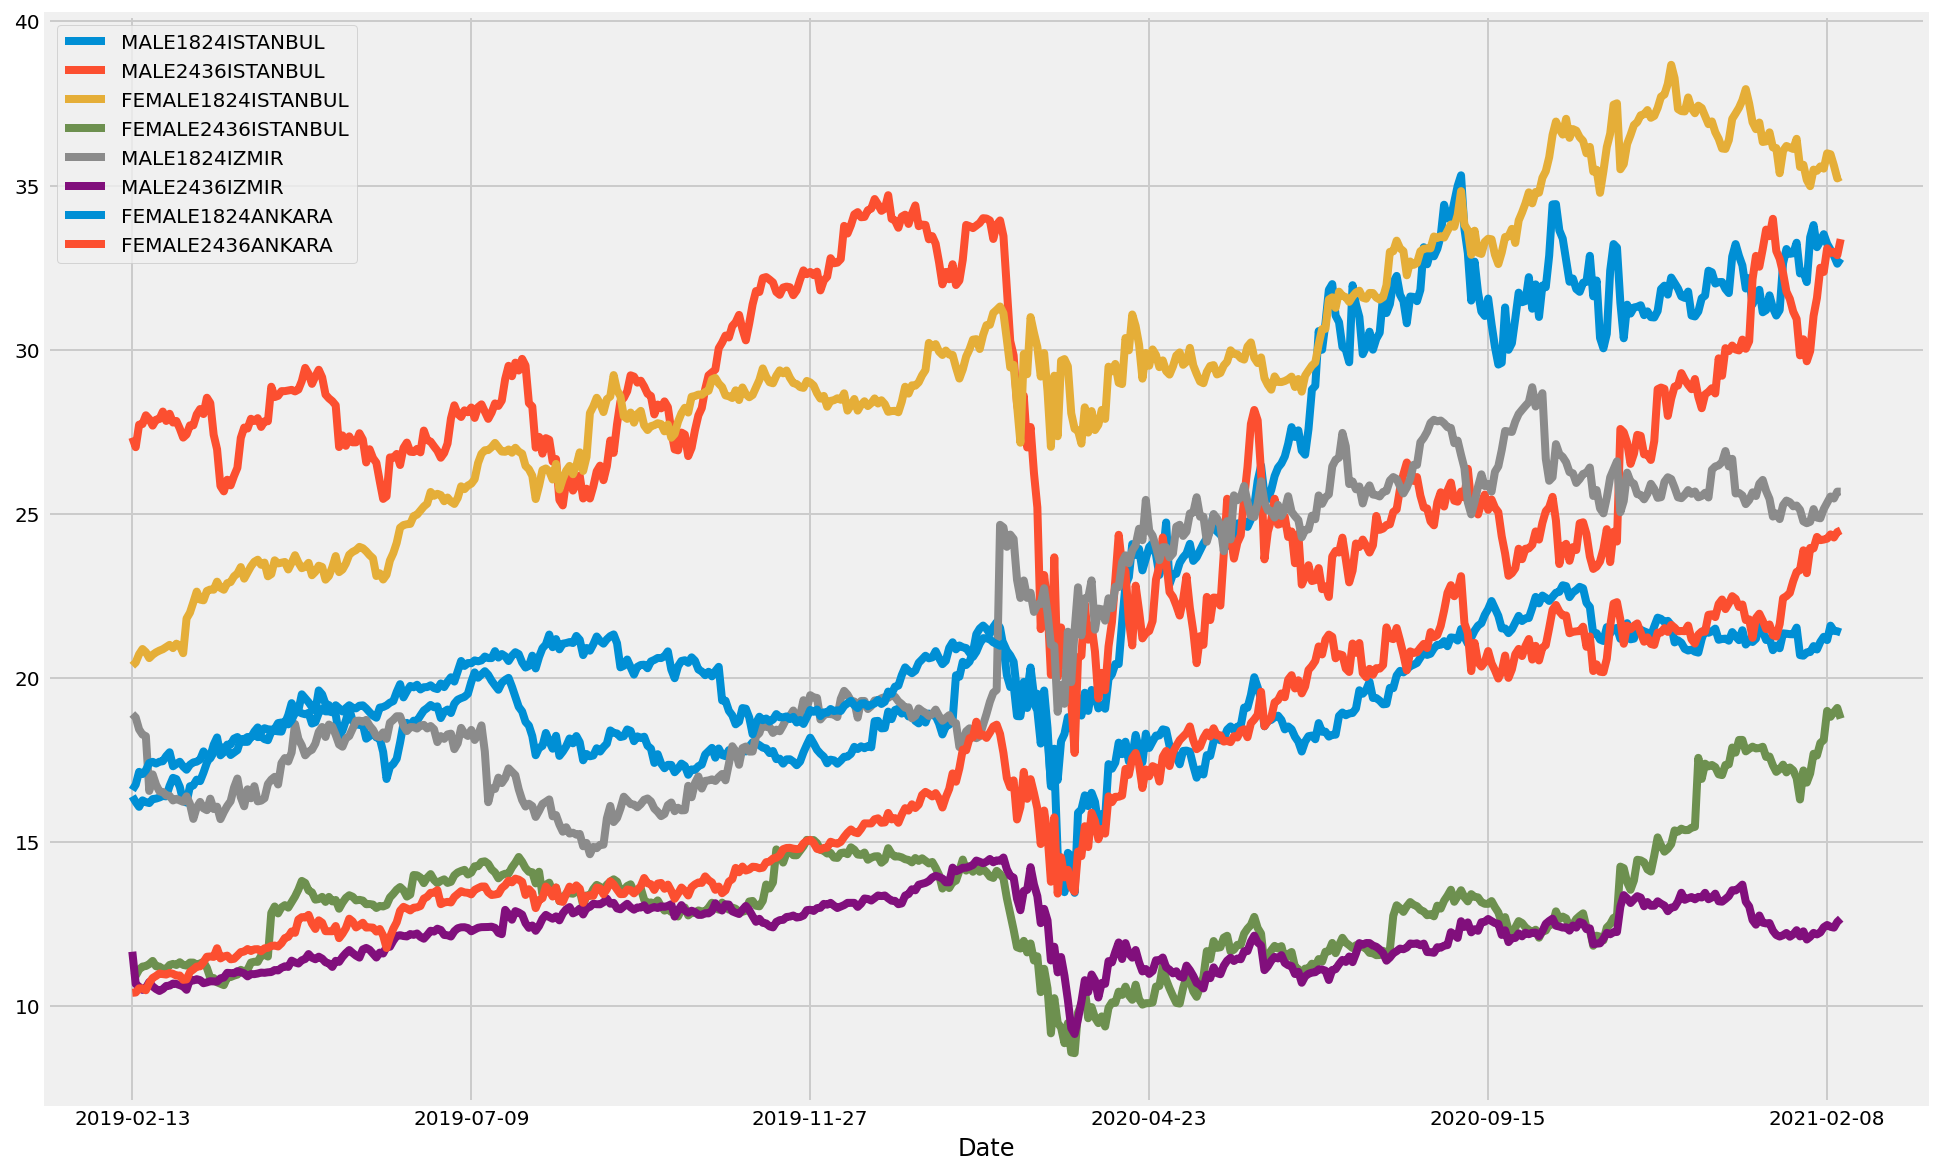

In [274]:
prices.plot(figsize=(15,10));

## Calculating the Covariance Matrix

In [275]:
import pypfopt
pypfopt.__version__

'1.4.0'

In [276]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,MALE1824ISTANBUL,MALE2436ISTANBUL,FEMALE1824ISTANBUL,FEMALE2436ISTANBUL,MALE1824IZMIR,MALE2436IZMIR,FEMALE1824ANKARA,FEMALE2436ANKARA
MALE1824ISTANBUL,0.096155,0.041647,0.040270,0.041584,0.032346,0.025936,0.033777,0.076703
MALE2436ISTANBUL,0.041647,0.200246,0.040058,0.115783,0.023749,0.075305,0.080043,0.083938
FEMALE1824ISTANBUL,0.040270,0.040058,0.055679,0.031488,0.024981,0.030823,0.032424,0.053011
FEMALE2436ISTANBUL,0.041584,0.115783,0.031488,0.149957,0.024056,0.060123,0.069177,0.069953
MALE1824IZMIR,0.032346,0.023749,0.024981,0.024056,0.131373,0.010259,0.032606,0.036344
MALE2436IZMIR,0.025936,0.075305,0.030823,0.060123,0.010259,0.076144,0.046682,0.049989
FEMALE1824ANKARA,0.033777,0.080043,0.032424,0.069177,0.032606,0.046682,0.092717,0.062769
FEMALE2436ANKARA,0.076703,0.083938,0.053011,0.069953,0.036344,0.049989,0.062769,0.114969


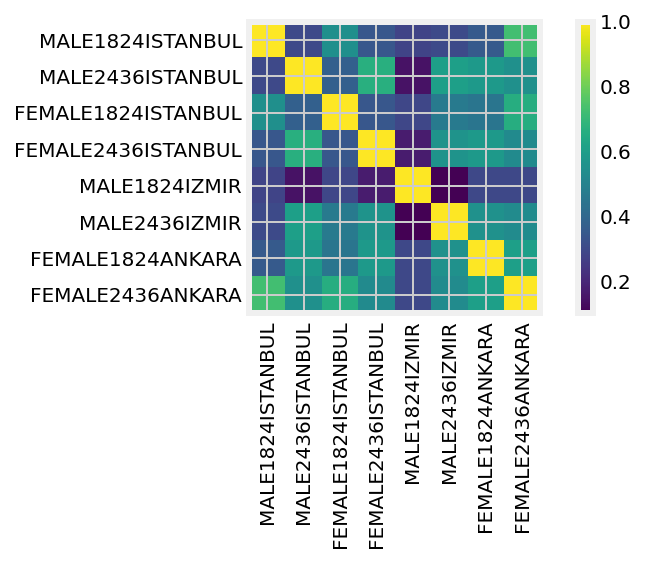

In [277]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

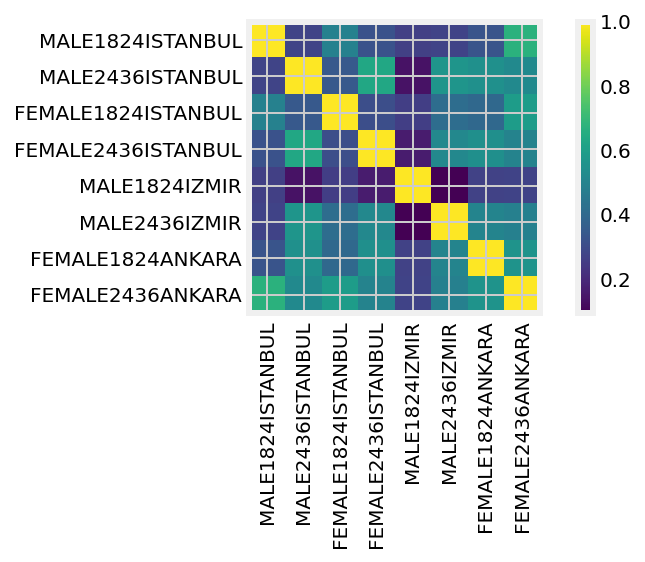

In [278]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

In [279]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

MALE1824ISTANBUL      0.243184
MALE2436ISTANBUL      0.399676
FEMALE1824ISTANBUL    0.197398
FEMALE2436ISTANBUL    0.342994
MALE1824IZMIR         0.201409
MALE2436IZMIR         0.235623
FEMALE1824ANKARA      0.278681
FEMALE2436ANKARA      0.334694
Name: mkt, dtype: float64

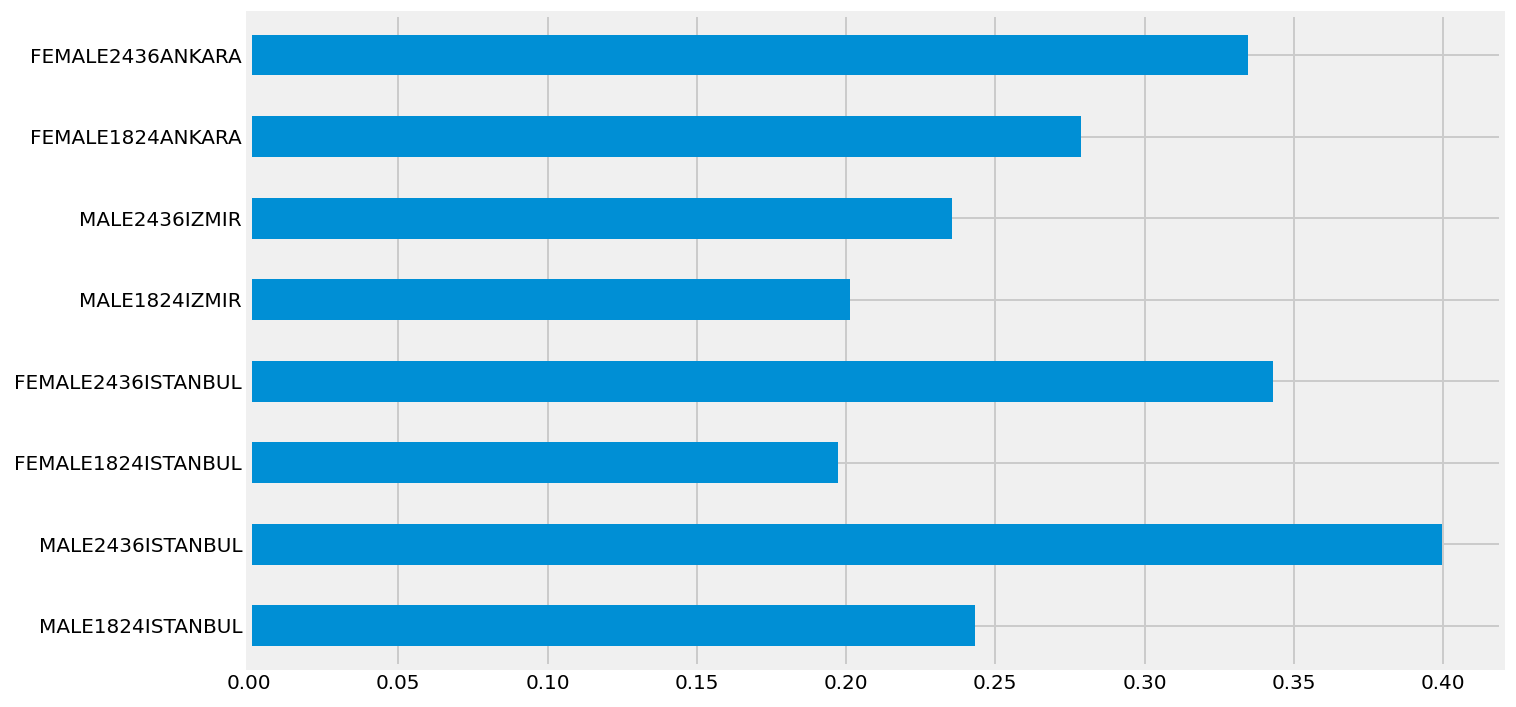

In [280]:
mu.plot.barh(figsize=(10,6));

## Long/Short Minimum Variance

In [281]:
from pypfopt import EfficientFrontier

In [282]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('MALE1824ISTANBUL', 0.21924),
             ('MALE2436ISTANBUL', -0.04823),
             ('FEMALE1824ISTANBUL', 0.388),
             ('FEMALE2436ISTANBUL', 0.04496),
             ('MALE1824IZMIR', 0.16584),
             ('MALE2436IZMIR', 0.301),
             ('FEMALE1824ANKARA', 0.14657),
             ('FEMALE2436ANKARA', -0.21737)])

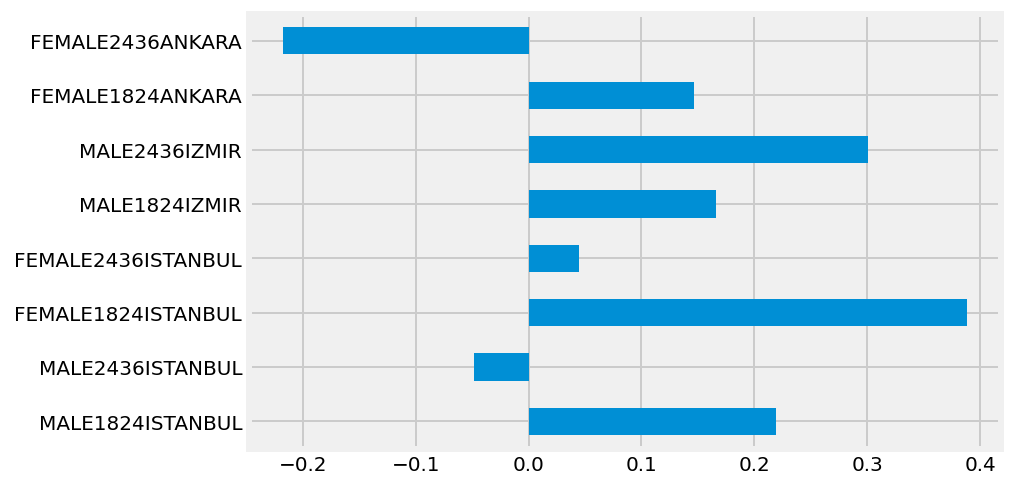

In [283]:
pd.Series(weights).plot.barh();

In [284]:
ef.portfolio_performance(verbose=True);

Annual volatility: 19.2%


In [285]:
prices

,MALE1824ISTANBUL,MALE2436ISTANBUL,FEMALE1824ISTANBUL,FEMALE2436ISTANBUL,MALE1824IZMIR,MALE2436IZMIR,FEMALE1824ANKARA,FEMALE2436ANKARA
Date,,,,,,,,
2019-02-13,16.400000,27.328671,20.376965,10.886948,18.906254,11.665981,16.590686,10.415038
2019-02-14,16.226500,27.033480,20.476550,10.932393,18.800199,10.681906,16.754546,10.423814
2019-02-15,16.079500,27.719078,20.728390,11.123062,18.438180,10.599899,17.145139,10.552527
2019-02-19,16.275800,27.738121,20.886388,11.213952,18.279755,10.503835,17.076546,10.547652
2019-02-20,16.221000,28.004740,20.789674,11.230746,18.231311,10.567097,17.194675,10.492813
...,...,...,...,...,...,...,...,...
2021-02-08,33.229399,33.090000,35.982999,19.000000,25.337333,12.480000,21.158000,24.247000
2021-02-09,33.050000,32.950001,35.956000,18.821001,25.530666,12.425000,21.598000,24.377000
2021-02-10,32.865801,32.980000,35.612000,18.963000,25.470667,12.400000,21.439999,24.282001


In [286]:
from pypfopt import DiscreteAllocation

latest_prices = prices.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Discrete allocation performed with $13.70 leftover


{'MALE1824ISTANBUL': 106,
 'FEMALE1824ISTANBUL': 174,
 'FEMALE2436ISTANBUL': 38,
 'MALE1824IZMIR': 102,
 'MALE2436IZMIR': 374,
 'FEMALE1824ANKARA': 108,
 'MALE2436ISTANBUL': -32,
 'FEMALE2436ANKARA': -201}

In [287]:
mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)

ef.max_sharpe()
weights = ef.clean_weights()

In [288]:
weights

OrderedDict([('MALE1824ISTANBUL', 0.12239),
             ('MALE2436ISTANBUL', 0.12979),
             ('FEMALE1824ISTANBUL', 0.11773),
             ('FEMALE2436ISTANBUL', 0.12721),
             ('MALE1824IZMIR', 0.12387),
             ('MALE2436IZMIR', 0.12013),
             ('FEMALE1824ANKARA', 0.1244),
             ('FEMALE2436ANKARA', 0.13447)])

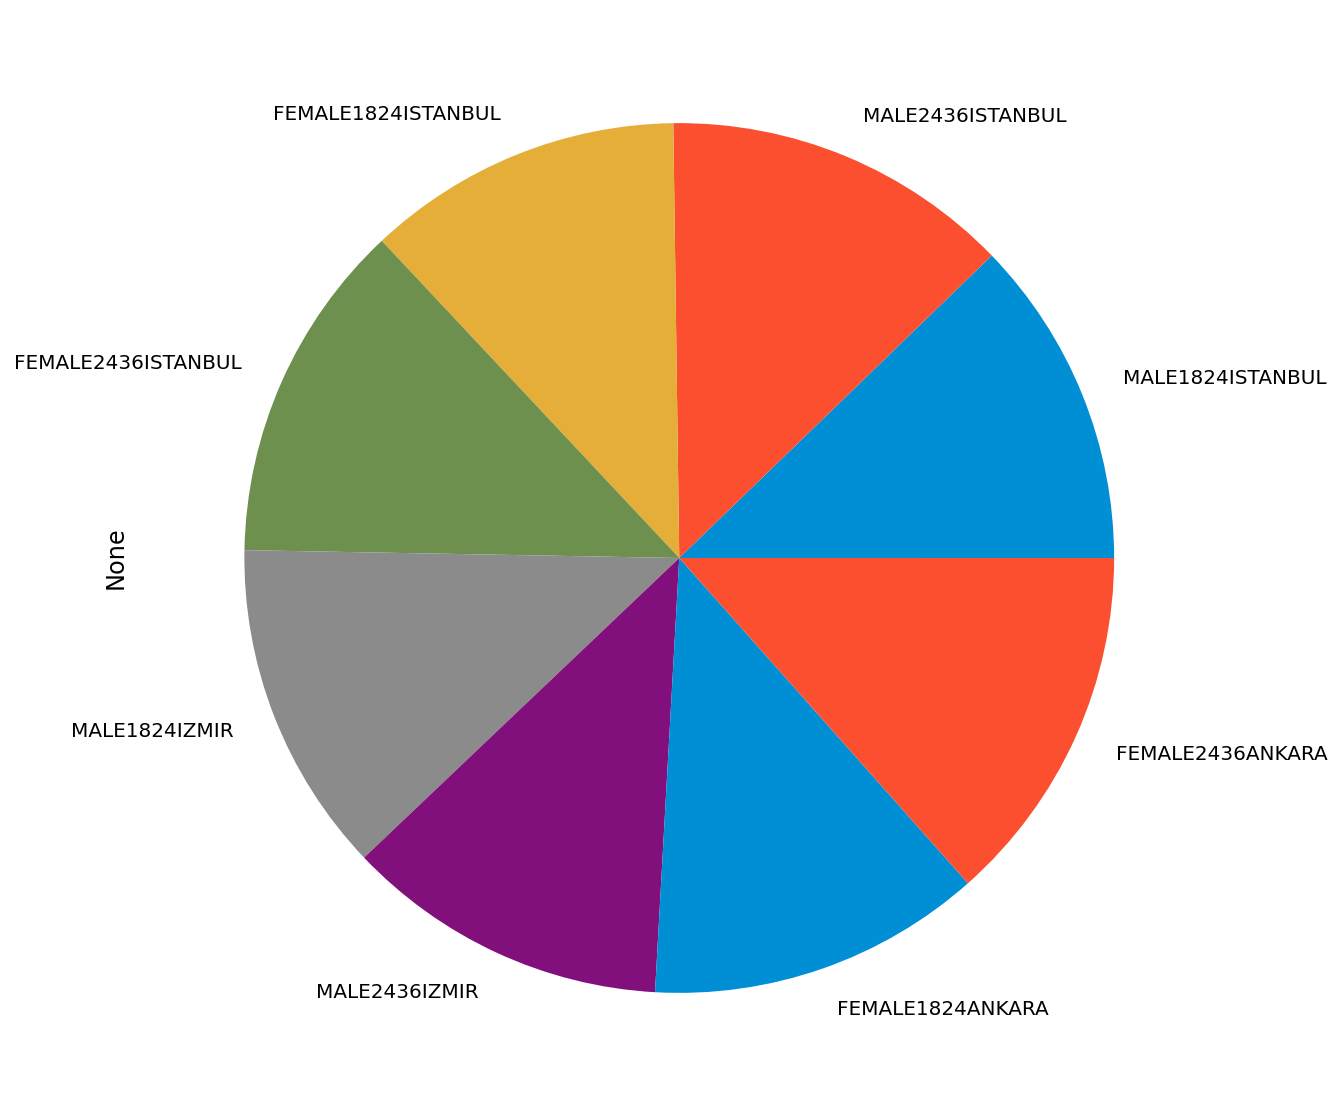

In [289]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [290]:
ef = EfficientFrontier(mu, S)
ef.efficient_risk(target_volatility=0.20)
weights = ef.clean_weights()
weights

OrderedDict([('MALE1824ISTANBUL', 0.13923),
             ('MALE2436ISTANBUL', 0.0),
             ('FEMALE1824ISTANBUL', 0.29304),
             ('FEMALE2436ISTANBUL', 0.05046),
             ('MALE1824IZMIR', 0.15863),
             ('MALE2436IZMIR', 0.24526),
             ('FEMALE1824ANKARA', 0.11338),
             ('FEMALE2436ANKARA', 0.0)])

In [291]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

2/8 tickers have zero weight


In [292]:
ef.portfolio_performance(verbose=True);

Expected annual return: 23.0%
Annual volatility: 20.0%
Sharpe Ratio: 1.05


In [293]:
from pypfopt import objective_functions

ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.efficient_risk(0.20)
weights = ef.clean_weights()
weights

OrderedDict([('MALE1824ISTANBUL', 0.14421),
             ('MALE2436ISTANBUL', 0.0),
             ('FEMALE1824ISTANBUL', 0.28652),
             ('FEMALE2436ISTANBUL', 0.04776),
             ('MALE1824IZMIR', 0.16422),
             ('MALE2436IZMIR', 0.2414),
             ('FEMALE1824ANKARA', 0.11589),
             ('FEMALE2436ANKARA', 0.0)])

In [294]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

2/8 tickers have zero weight


In [295]:
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=1)  # gamme is the tuning parameter
ef.efficient_risk(0.20)
weights = ef.clean_weights()
weights

OrderedDict([('MALE1824ISTANBUL', 0.15041),
             ('MALE2436ISTANBUL', 0.0),
             ('FEMALE1824ISTANBUL', 0.2797),
             ('FEMALE2436ISTANBUL', 0.04271),
             ('MALE1824IZMIR', 0.17353),
             ('MALE2436IZMIR', 0.23554),
             ('FEMALE1824ANKARA', 0.11812),
             ('FEMALE2436ANKARA', 0.0)])

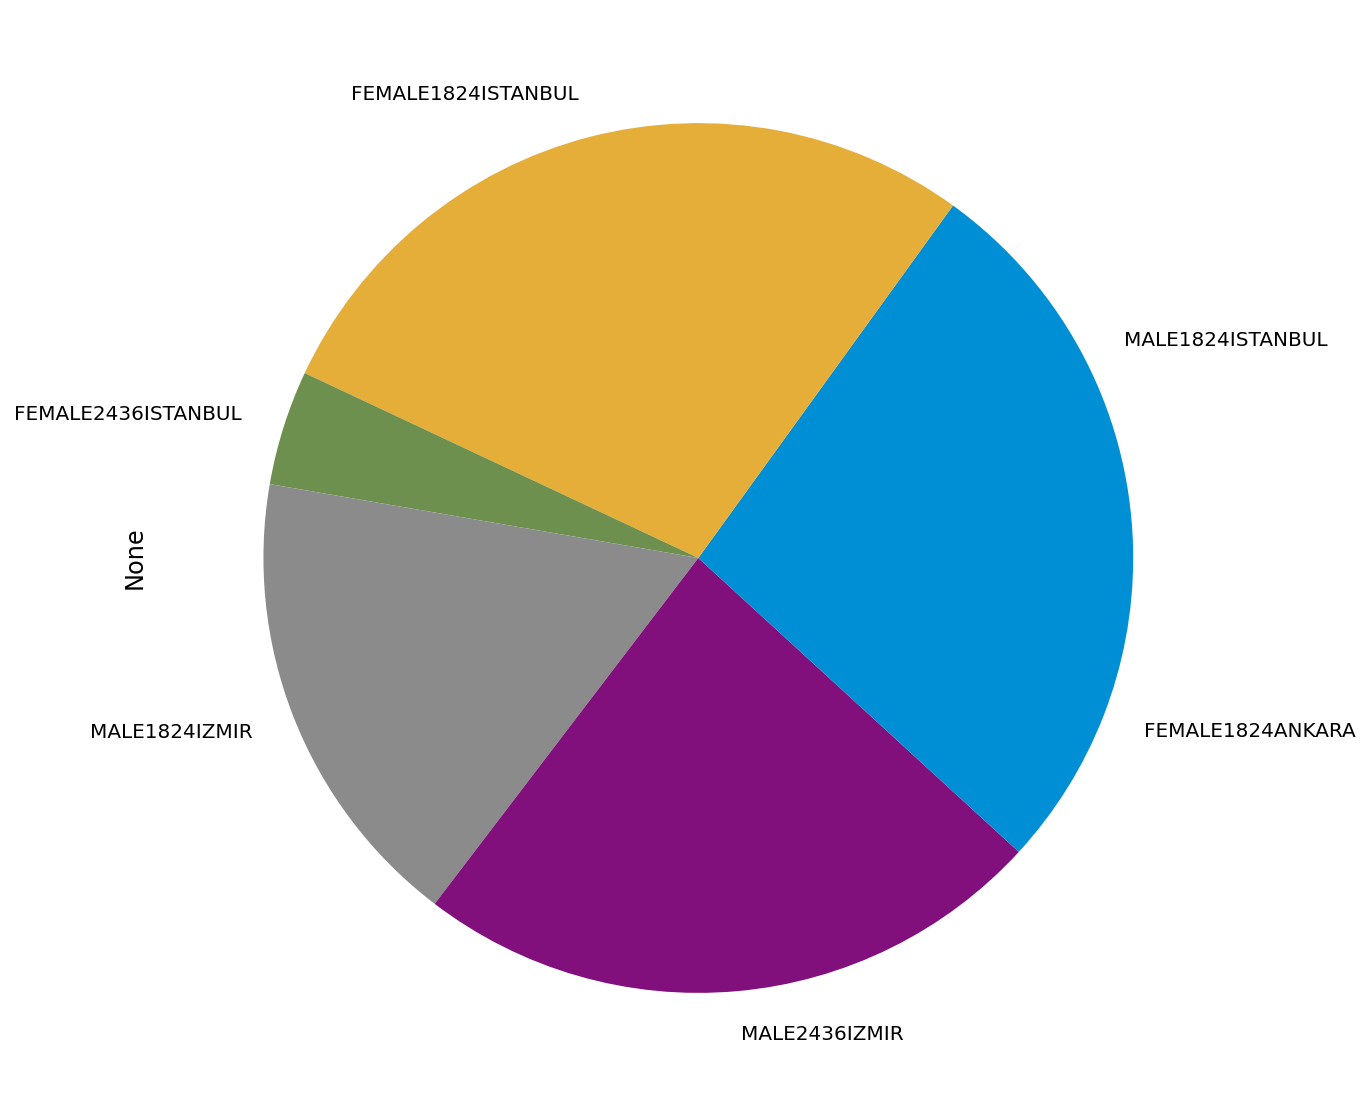

In [296]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [297]:
ef.portfolio_performance(verbose=True);

Expected annual return: 23.0%
Annual volatility: 20.0%
Sharpe Ratio: 1.05


## Minimise Risk for A Given Return, Market-Neutral

In [298]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.07, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('MALE1824ISTANBUL', -0.06417),
             ('MALE2436ISTANBUL', 0.22085),
             ('FEMALE1824ISTANBUL', -0.15728),
             ('FEMALE2436ISTANBUL', 0.11528),
             ('MALE1824IZMIR', -0.13632),
             ('MALE2436IZMIR', -0.09003),
             ('FEMALE1824ANKARA', -0.00243),
             ('FEMALE2436ANKARA', 0.11411)])

In [299]:
ef.portfolio_performance(verbose=True);

Expected annual return: 7.0%
Annual volatility: 12.8%
Sharpe Ratio: 0.39


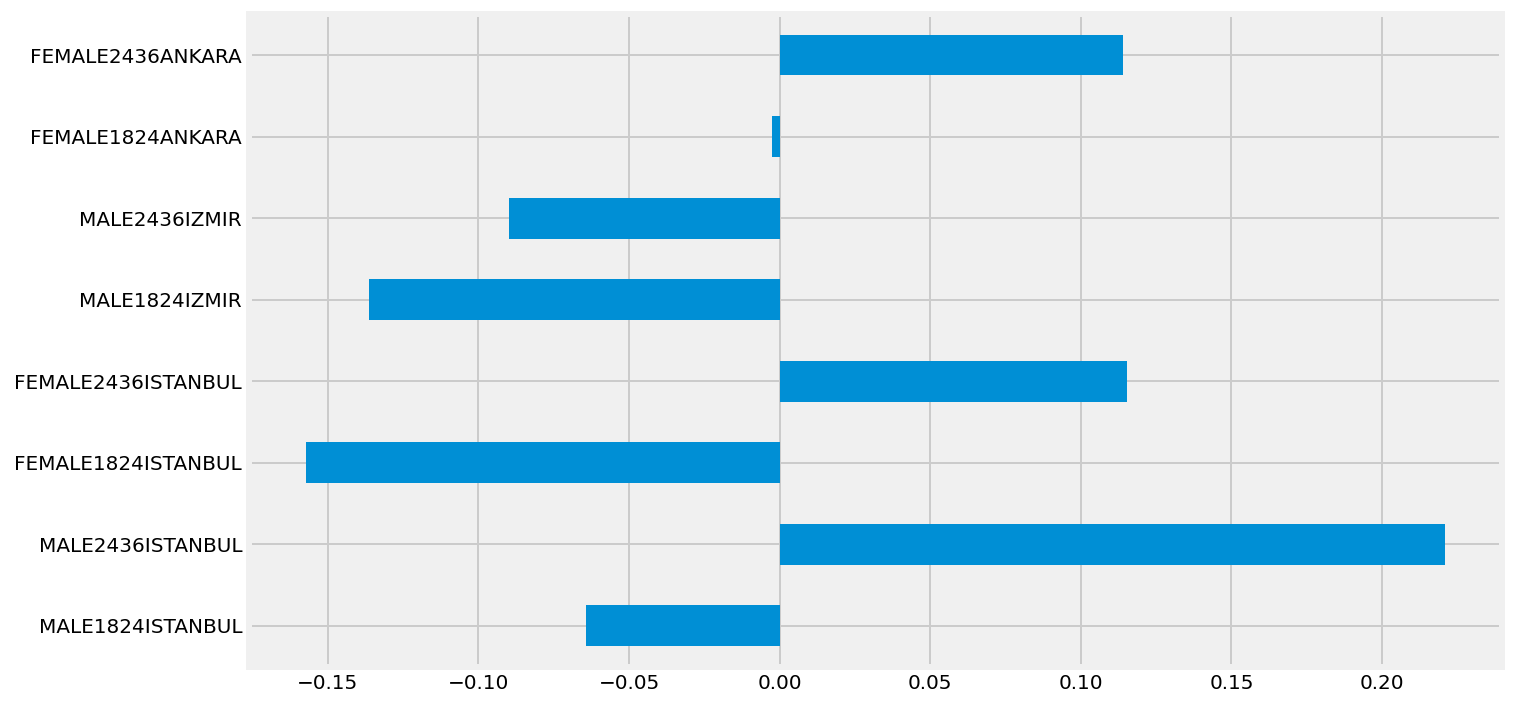

In [300]:
pd.Series(weights).plot.barh(figsize=(10,6));

In [301]:
print(f"Net weight: {sum(weights.values()):.2f}")

Net weight: 0.00


## Efficient Semi-Variance Optimisation

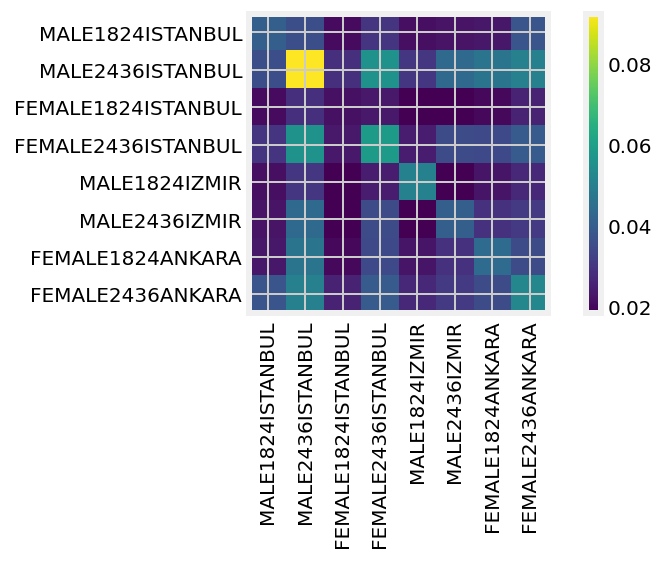

In [302]:
semicov = risk_models.semicovariance(prices, benchmark=0)
plotting.plot_covariance(semicov);

In [303]:
ef = EfficientFrontier(mu, semicov)
ef.efficient_return(0.2)
weights = ef.clean_weights()
weights


OrderedDict([('MALE1824ISTANBUL', 0.01678),
             ('MALE2436ISTANBUL', 0.0),
             ('FEMALE1824ISTANBUL', 0.78416),
             ('FEMALE2436ISTANBUL', 0.0),
             ('MALE1824IZMIR', 0.08024),
             ('MALE2436IZMIR', 0.11883),
             ('FEMALE1824ANKARA', 0.0),
             ('FEMALE2436ANKARA', 0.0)])

In [304]:
ef.portfolio_performance(verbose=True);

Expected annual return: 20.3%
Annual volatility: 14.6%
Sharpe Ratio: 1.25


In [305]:
returns = expected_returns.returns_from_prices(prices)
returns = returns.dropna()

In [306]:
from pypfopt import EfficientSemivariance

es = EfficientSemivariance(mu, returns)
es.efficient_return(0.2)
es.portfolio_performance(verbose=True);


Expected annual return: 20.9%
Annual semi-deviation: 13.7%
Sortino Ratio: 1.38


In [307]:
es.weights = ef.weights
es.portfolio_performance(verbose=True);

Expected annual return: 20.3%
Annual semi-deviation: 14.0%
Sortino Ratio: 1.31


## Efficient CVaR Optimisation

In [308]:
returns = expected_returns.returns_from_prices(prices).dropna()
returns.head()

,MALE1824ISTANBUL,MALE2436ISTANBUL,FEMALE1824ISTANBUL,FEMALE2436ISTANBUL,MALE1824IZMIR,MALE2436IZMIR,FEMALE1824ANKARA,FEMALE2436ANKARA
Date,,,,,,,,
2019-02-14,-0.010579,-0.010802,0.004887,0.004174,-0.005610,-0.084354,0.009877,0.000843
2019-02-15,-0.009059,0.025361,0.012299,0.017441,-0.019256,-0.007677,0.023313,0.012348
2019-02-19,0.012208,0.000687,0.007622,0.008171,-0.008592,-0.009063,-0.004001,-0.000462
2019-02-20,-0.003367,0.009612,-0.004630,0.001498,-0.002650,0.006023,0.006918,-0.005199
2019-02-21,-0.001640,-0.004080,-0.008659,0.005366,-0.091493,0.016851,0.012854,0.021092


In [309]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 28.1%
Annual volatility: 23.3%
Sharpe Ratio: 1.12


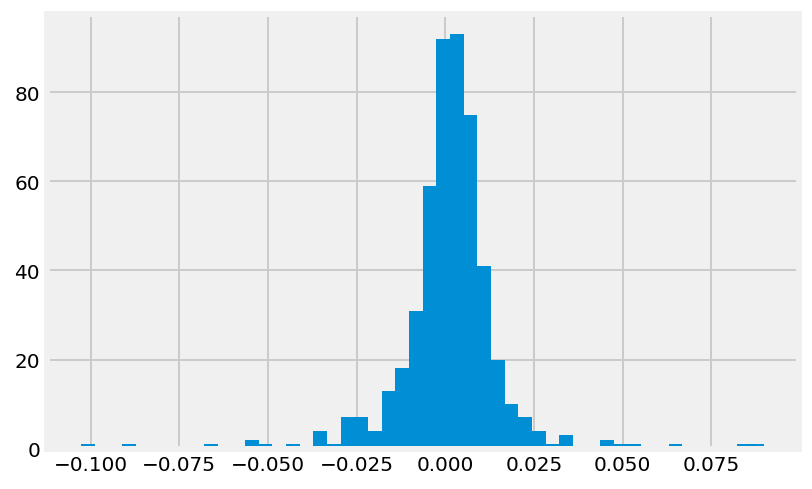

In [310]:
# Compute CVaR
portfolio_rets = (returns * weight_arr).sum(axis=1)
portfolio_rets.hist(bins=50);

In [311]:
# VaR
var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(100*var))
print("CVaR: {:.2f}%".format(100*cvar))

VaR: -2.17%
CVaR: -3.76%


In [312]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True);

Expected annual return: 20.7%
Conditional Value at Risk: 3.01%


In [313]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.efficient_risk(target_cvar=0.20)
ec.portfolio_performance(verbose=True);

Expected annual return: 40.0%
Conditional Value at Risk: 15.85%


In [314]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 27.4%
Annual volatility: 22.7%
Sharpe Ratio: 1.12


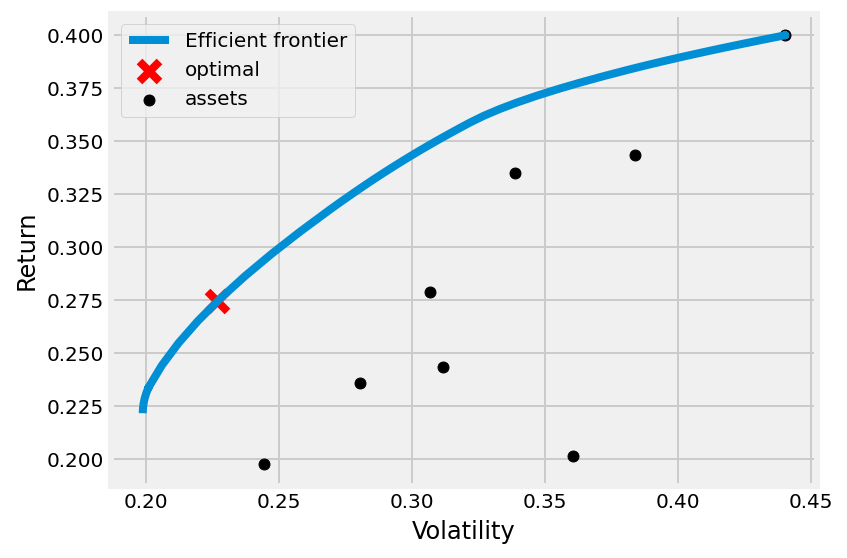

In [315]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

## Complex Plots

In [316]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

Sample portfolio returns: [0.26699761 0.28822665 0.29018112 ... 0.25087181 0.28901365 0.24783561]
Sample portfolio volatilities: 0       0.228493
1       0.259050
2       0.245440
3       0.256039
4       0.223275
          ...   
9995    0.225488
9996    0.235218
9997    0.215964
9998    0.254735
9999    0.217536
Length: 10000, dtype: float64


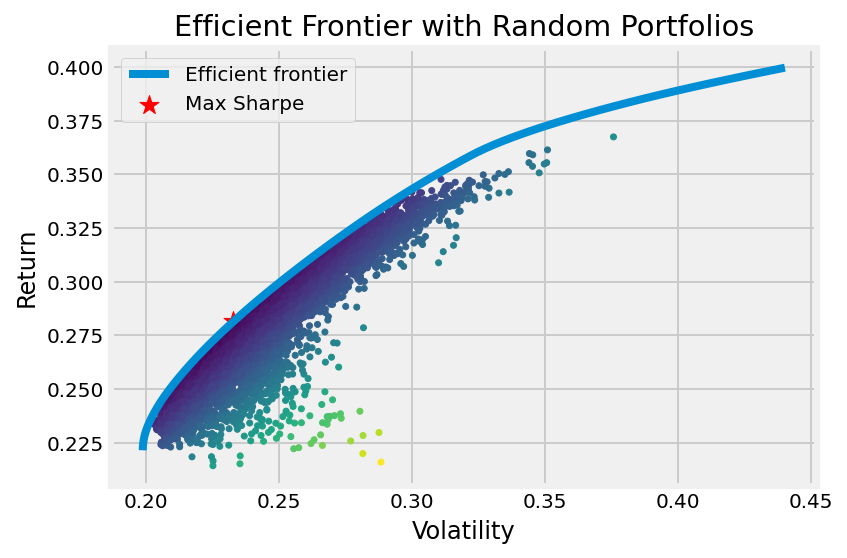

In [317]:
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

ax.set_title("Efficient Frontier with Random Portfolios")
ax.legend()
plt.tight_layout()
plt.show()
